## Welcome to Colaboratory!

Colaboratory is a Google research project created to help disseminate machine learning education and research. It's a Jupyter notebook environment that requires no setup to use and runs entirely in the cloud.

Colaboratory notebooks are stored in [Google Drive](https://drive.google.com) and can be shared just as you would with Google Docs or Sheets. Colaboratory is free to use.

For more information, see our [FAQ](https://research.google.com/colaboratory/faq.html).

## Python 3 (NEW!)

Colab now supports both Python2 and Python3 for code execution. 

* When creating a new notebook, you'll have the choice between Python 2 and Python 3.
* You can also change the language associated with a notebook; this information will be written into the `.ipynb` file itself, and thus will be preserved for future sessions.

In [2]:
import sys
print('Hello, Colaboratory from Python {}!'.format(sys.version_info[0]))

Hello, Colaboratory from Python 3!


Colaboratory allows you to execute TensorFlow code in your browser with a single click. The example below adds two matrices.

$\begin{bmatrix}
  1. & 1. & 1. \\
  1. & 1. & 1. \\
\end{bmatrix} +
\begin{bmatrix}
  1. & 2. & 3. \\
  4. & 5. & 6. \\
\end{bmatrix} =
\begin{bmatrix}
  2. & 3. & 4. \\
  5. & 6. & 7. \\
\end{bmatrix}$

In [3]:
import tensorflow as tf
import numpy as np

with tf.Session():
  input1 = tf.constant(1.0, shape=[2, 3])
  input2 = tf.constant(np.reshape(np.arange(1.0, 7.0, dtype=np.float32), (2, 3)))
  output = tf.add(input1, input2)
  result = output.eval()

result

array([[ 2.,  3.,  4.],
       [ 5.,  6.,  7.]], dtype=float32)

Colaboratory includes widely used libraries like [matplotlib](https://matplotlib.org/), simplifying visualization.

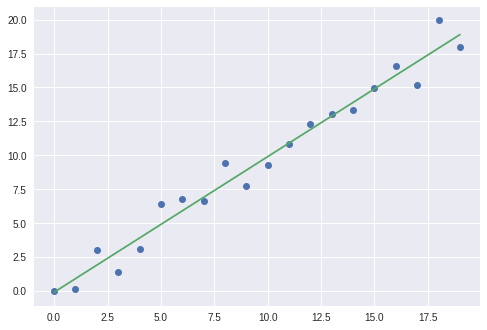

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
y = [x_i + np.random.randn(1) for x_i in x]
a, b = np.polyfit(x, y, 1)
_ = plt.plot(x, y, 'o', np.arange(20), a*np.arange(20)+b, '-')

Want to use a new library?  `pip install` it. For recipes to import commonly used libraries, refer to the [importing libraries example notebook](/notebook#fileId=/v2/external/notebooks/snippets/importing_libraries.ipynb)

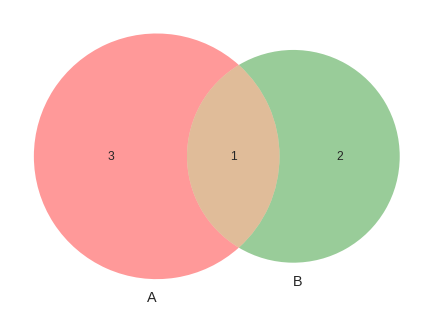

In [5]:
# Only needs to be run once at the top of the notebook.
!pip install -q matplotlib-venn

# Now the newly-installed library can be used anywhere else in the notebook.
from matplotlib_venn import venn2
venn2(subsets = (3, 2, 1))

## For more information:
- [Overview of Colaboratory](/notebook#fileId=/v2/external/notebooks/basic_features_overview.ipynb)
- [Importing libraries and installing dependencies](/notebook#fileId=/v2/external/notebooks/snippets/importing_libraries.ipynb)
- [Markdown guide](/notebook#fileId=/v2/external/notebooks/markdown_guide.ipynb)
- [Charts](/notebook#fileId=/v2/external/notebooks/charts.ipynb)
- [Loading and saving data: local files, Drive, Sheets, Google Cloud Storage](/notebook#fileId=/v2/external/notebooks/io.ipynb)
- [Example Google Cloud BigQuery notebook](/notebook#fileId=/v2/external/notebooks/bigquery.ipynb)


In [5]:
!pip install -q keras

In [18]:
from google.colab import files
uploaded = files.upload()

#Save uploaded file on the Virtual Machine's 
#Thanks to user3800642 from StackOverflow 

with open("breast_cancer.csv", 'wb') as f:
    #f.write(uploaded[uploaded.keys()[0]])
    f.write(uploaded[list(uploaded.keys())[0]])

In [19]:
!ls
!cat breast_cancer.csv

breast_cancer.csv  datalab



























































































































































































































































































































































































































































































































































































92751,B,7.76,24.54,47.92,181,0.05263,0.04362,0,0,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0,0,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0,0,0.2871,0.07039

In [20]:
import numpy as np
import pandas as pd

#Importing dataset
dataset = pd.read_csv('breast_cancer.csv',sep=',')

#Check the first 5 rows of the dataset. 
dataset.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [21]:
X = dataset.iloc[:, 2:32].values
y = dataset.iloc[:, 1].values

In [22]:
#Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

y = labelencoder.fit_transform(y)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
!pip show tensorflow

Name: tensorflow
Version: 1.4.1
Summary: TensorFlow helps the tensors flow
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: six, wheel, enum34, tensorflow-tensorboard, numpy, protobuf


In [25]:
!pip show tensorflow

Name: tensorflow
Version: 1.4.1
Summary: TensorFlow helps the tensors flow
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: wheel, enum34, six, tensorflow-tensorboard, protobuf, numpy


In [26]:
!pip install tensorflow==1.2

    100% |████████████████████████████████| 35.0MB 36kB/s 
    100% |████████████████████████████████| 245kB 4.4MB/s 
  Running setup.py bdist_wheel for markdown ... - \ | / - done
  Stored in directory: /content/.cache/pip/wheels/b9/4f/6c/f4c1c5207c1d0eeaaf7005f7f736620c6ded6617c9d9b94096
Successfully built markdown
  Found existing installation: Markdown 2.6.10
    Uninstalling Markdown-2.6.10:
      Successfully uninstalled Markdown-2.6.10
  Found existing installation: tensorflow 1.4.1
    Uninstalling tensorflow-1.4.1:
      Successfully uninstalled tensorflow-1.4.1


In [27]:
!pip install -q keras

In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [29]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))

# Adding the second hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
455/455 [==============================] - 0s 323us/step - loss: 0.6568 - acc: 0.4769
Epoch 2/100
455/455 [==============================] - 0s 135us/step - loss: 0.5190 - acc: 0.8484
Epoch 3/100
455/455 [==============================] - 0s 134us/step - loss: 0.3641 - acc: 0.8659
Epoch 4/100
455/455 [==============================] - 0s 131us/step - loss: 0.3024 - acc: 0.8945
Epoch 5/100
455/455 [==============================] - 0s 122us/step - loss: 0.2968 - acc: 0.8747
Epoch 6/100
455/455 [==============================] - 0s 137us/step - loss: 0.2737 - acc: 0.8857
Epoch 7/100
455/455 [==============================] - 0s 158us/step - loss: 0.2473 - acc: 0.8989
Epoch 8/100
455/455 [==============================] - 0s 146us/step - loss: 0.2463 - acc: 0.9077
Epoch 9/100
455/455 [==============================] - 0s 138us/step - loss: 0.2587 - acc: 0.9033
Epoch 10/100
455/455 [==============================] - 0s 125us/step - loss: 0.2424 - acc: 0.8967
Epoch 11/100
455/45

455/455 [==============================] - 0s 142us/step - loss: 0.2135 - acc: 0.9121
Epoch 26/100
455/455 [==============================] - 0s 165us/step - loss: 0.2469 - acc: 0.9077
Epoch 27/100
455/455 [==============================] - 0s 153us/step - loss: 0.2126 - acc: 0.9209
Epoch 28/100
455/455 [==============================] - 0s 146us/step - loss: 0.2057 - acc: 0.9121
Epoch 29/100
455/455 [==============================] - 0s 150us/step - loss: 0.2055 - acc: 0.9231
Epoch 30/100
455/455 [==============================] - 0s 156us/step - loss: 0.2130 - acc: 0.9187
Epoch 31/100
455/455 [==============================] - 0s 150us/step - loss: 0.1944 - acc: 0.9209
Epoch 32/100
455/455 [==============================] - 0s 144us/step - loss: 0.2049 - acc: 0.9209
Epoch 33/100
455/455 [==============================] - 0s 154us/step - loss: 0.2065 - acc: 0.9209
Epoch 34/100
455/455 [==============================] - 0s 155us/step - loss: 0.1982 - acc: 0.9121
Epoch 35/100
455/455 [=

Epoch 50/100
455/455 [==============================] - 0s 156us/step - loss: 0.1867 - acc: 0.9209
Epoch 51/100
455/455 [==============================] - 0s 146us/step - loss: 0.2111 - acc: 0.9143
Epoch 52/100
455/455 [==============================] - 0s 152us/step - loss: 0.2220 - acc: 0.9231
Epoch 53/100
455/455 [==============================] - 0s 152us/step - loss: 0.1768 - acc: 0.9319
Epoch 54/100
455/455 [==============================] - 0s 160us/step - loss: 0.1729 - acc: 0.9231
Epoch 55/100
455/455 [==============================] - 0s 148us/step - loss: 0.2022 - acc: 0.9143
Epoch 56/100
455/455 [==============================] - 0s 155us/step - loss: 0.1870 - acc: 0.9187
Epoch 57/100
455/455 [==============================] - 0s 146us/step - loss: 0.1714 - acc: 0.9231
Epoch 58/100
455/455 [==============================] - 0s 146us/step - loss: 0.1660 - acc: 0.9319
Epoch 59/100
455/455 [==============================] - 0s 146us/step - loss: 0.1795 - acc: 0.9319
Epoch 60/1

455/455 [==============================] - 0s 144us/step - loss: 0.1610 - acc: 0.9341
Epoch 76/100
455/455 [==============================] - 0s 162us/step - loss: 0.1663 - acc: 0.9275
Epoch 77/100
455/455 [==============================] - 0s 151us/step - loss: 0.1656 - acc: 0.9253
Epoch 78/100
455/455 [==============================] - 0s 146us/step - loss: 0.2261 - acc: 0.9165
Epoch 79/100
455/455 [==============================] - 0s 152us/step - loss: 0.1608 - acc: 0.9275
Epoch 80/100
455/455 [==============================] - 0s 158us/step - loss: 0.1463 - acc: 0.9297
Epoch 81/100
455/455 [==============================] - 0s 153us/step - loss: 0.1617 - acc: 0.9187
Epoch 82/100
455/455 [==============================] - 0s 146us/step - loss: 0.1656 - acc: 0.9363
Epoch 83/100
455/455 [==============================] - 0s 152us/step - loss: 0.1540 - acc: 0.9385
Epoch 84/100
455/455 [==============================] - 0s 156us/step - loss: 0.1702 - acc: 0.9275
Epoch 85/100
455/455 [=

455/455 [==============================] - 0s 165us/step - loss: 0.1364 - acc: 0.9385


In [30]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 

In [31]:
cm

array([[71,  0],
       [ 7, 36]])